# **Data Visualization with Python**

# Part 5_Complex Subplots

#### Author: Avery Jan

#### Date: 3-20-2023

# Overview
Unlike the rest of the project that uses large real-world datasets, this part of the project mostly uses data generated within the code to create visualizations. The only exception is Section B, which uses a small dataset loaded from a .csv file. Also, this part of the project introduces new types of plots such as Contour Plot, Fill-between plot, and Imshow plot. Moreover, the term 'complex' in the title reflects these characteristics of the visualization making processes in this part of the project: (1) Multiple types of plots created in a subplot as opposed to same type of plots in a subplot in the Simple Subplots category (2) The complexity involved in some of the data generation steps. 

This part consists of two sections. The subplots generated in either section are summarized below:
  
   Section A - Mapping a Trail 
   - Subplot 1: Contour Plot and Line Plot
   - Subplot 2: Fill_between Plot
               
   Section B - Visualizing 'experimental' results: Plate fracture study 
   - Subplot 1: Scatter Plot and Line Plot
   - Subplot 2: Line Plots and Fill-between Plot
   - Subplot 3: Imshow Plot
<br>
<Br>

***
<br>

# A. Mapping a Trail<a id="2"></a>


<Figure size 1200x600 with 0 Axes>

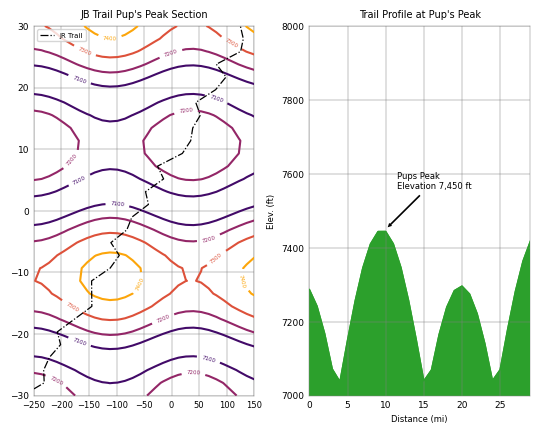

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Step 1: Make up some data.
x = np.linspace(-250.0, 150.0, 30)
y = np.linspace(-30.0, 30.0, 30)

# Step 2: Make up the trail coordinates.
jb_trail_x = x + np.random.rand(len(y))*40-30
jb_trail_y = y

# Step 3: Make a grid that is a combination of every x and every y.
X, Y = np.meshgrid(x, y)

# Step 4: Define the park elevation at each coordinate pair (x,y).
Z = abs(150*np.cos(110*X)**2 + 300*np.sin(Y*12)) + 7000

# Step 5: Define the elevation along the JR trail.
jb_trail_elevation = np.zeros(30)
j=0
for i in range(0,30):
    jb_trail_elevation[j] = Z[i,i]
    j+=1

# Step 6: Define the x-axis variable for the second subplot representing distance along trail.
jb_trail_transect = np.linspace(0,29,30)

# Step 7: Create a figure object.
fig = plt.figure(figsize=(12,6))

# Step 8: Create two subplots.
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=0.25)

# Step 9: Create contour plot for Subplot 1.
contour = ax1.contour(X, Y, Z, levels=4, cmap='inferno')

# Step 10: Create levels for labeling.
ax1.clabel(contour, contour.levels, fontsize=4)

# Step 11: Set axes limits.
ax1.set_xlim(-250, 150)
ax1.set_ylim(-30,30)

# Step 12: Set xticks and yticks
ax1.set_xticks([-250, -200, -150, -100, -50, 0, 50, 100, 150])
ax1.set_yticks([-30, -20, -10, 0, 10, 20, 30])

# Step 13: Format xticks and yticks label.
ax1.tick_params(axis='x', color= 'grey', which = 'major', width =0, length=0, labelsize=6)
ax1.tick_params(axis='y', color = 'grey', which = 'major', width =0, length=0, labelsize=6.5)

# Step 14: Add JB trail.
ax1.plot(jb_trail_x, jb_trail_y, label='JR Trail', linestyle='-.', linewidth=0.9, color ='k')

# Step 15: Set legend location.
ax1.legend(loc="upper left", fontsize=5)

# Step 16: Add a grey background grid.
ax1.grid(linestyle='-', linewidth=0.35, color='grey', zorder=-10)

# Step 17: Set spines color.
plt.setp(ax1.spines.values(), linewidth=0.35, color='grey', zorder=-10)

# Step 18: Add a title.
ax1.set_title("JB Trail Pup's Peak Section", fontsize=7)

## End of Subplot 1. 

# Step 19: Create filled plot for Subplot 2.
ax2.plot(jb_trail_transect, jb_trail_elevation, linestyle='-', linewidth=1, color='C2')

# Step 20: Create filled areas.
ax2.fill_between(jb_trail_transect, jb_trail_elevation, np.zeros(len(x)), color='C2')

# Step 21: Set axes limits.
ax2.set_xlim(0, 28.9)
ax2.set_ylim(7000, 8000)

# Step 22: Set xticks and yticks.
ax2.set_xticks([0, 5, 10, 15, 20, 25])
ax2.set_yticks([7000, 7200, 7400, 7600, 7800, 8000])

# Step 23: Format xticks and yticks label.
ax2.tick_params(axis='x', color= 'grey', which = 'major', width =0, length=0, labelsize=6.5)
ax2.tick_params(axis='y', color = 'grey', which = 'major', width =0, length=0, labelsize=6.5)

# Step 24: Add x and y labels.
ax2.set_xlabel('Distance (mi)', fontsize=6)
ax2.set_ylabel('Elev. (ft)', fontsize=6)

# Step 25: Add a grey background grid.
ax2.grid(linestyle='-', linewidth=0.35, color='grey', zorder=-10)

# Step 26: Annotate the filled plot.
ax2.annotate('Pups Peak\nElevation 7,450 ft', xy = (10,7450), xytext=(11.5,7560), fontsize=6,\
             arrowprops=dict(arrowstyle='simple', facecolor='k', edgecolor='none'))

# Step 27: Set spines color.
plt.setp(ax2.spines.values(), linewidth=0.35, color='grey', zorder=-10)

# Step 28: Add a title.
ax2.set_title("Trail Profile at Pup's Peak", fontsize=7)

# Step 29: Save the figure as a .png file.
plt.savefig('Part 5_A_figure.png', bbox_inches='tight')

# B. Visualizing 'experimental' results: Plate fracture study <a id="2"></a>


### Introduction
The visualizations presented in this section was completed on the Codio platform hosted by Cornell University. The code that generated the visualizations is included below. NumPy's linespace() and rand() methods were used to generate data for making some of the visualizations. The plotting function 'imshow()' in the pyplot module was used for the first time in this project to generate an image of a plate cross section that shows various levels of stress exerted on it. In this section, three subplots relevant to plate fracture were created: 
1. Scatter Plot of observed displacement (displacement of a plate due to the stress exerted on it) and line plot of averaged displacement, both versus time (data: generated within the code)
2. Line Plots of stress vs strain, one for actual data and the other for estimated data at 95% confidence level (data: loaded from a .csv file)
3. An image showing stress exerted on a plate cross section (data: generated within the code)

Note: Despite the term 'experimental' in the title, the 'observations' data used to create subplot 1 and the 'stress' data (Z) used to create subplot 3 were actually generated by the code to mimic the data that would have been otherwise collected from experiments. In addition, the values to show 95% confidence level were also generated by the code using a formula chosen by the author for the purpose of demonstrating a situation where a Fill-between plot is applicable.
<br>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


# ***Section 1: Gathering data needed for the subplots***

# Subplot 1: Displacement vs. Time
# a. Define a helper function for calculating the moving average of displacement to be shown in subplot 1).
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
# b. Generate data for subplot 1.
time = np.linspace(0,100, 101)
displacement = np.concatenate([np.random.rand(70), np.random.rand(31)+3])
ave_displacement = moving_average(displacement, n=4)
ave_displacement = np.concatenate([ave_displacement[0:3], ave_displacement])

# Subplot 2: Stress vs. Strain Realtionship 
# a. load the stress and strain data to be shown in subplot 2. 
stress_strain = np.loadtxt('stress_strain.csv', delimiter=',')
# b. Get the data from the loaded dataset for subplot 2 (Stress vs. Strain)
stress_true = stress_strain[:,0]
strain_true = stress_strain[:,1]
stress_est = stress_strain[:,2]
strain_est = stress_strain[:,3]
# c. Calculate the values of stress above and below the estimated values to show the 95% confidence level of the estimate.   
stress_est_max = 1.15*stress_est
stress_est_min = .9*stress_est

# Subplot 3: Stress on Plate Cross Section
# a. Create the grid for plate cross section.
x = np.linspace(-10.0, 10.0, 1000)
y = np.linspace(-10.0, 10.0, 1000)
X, Y = np.meshgrid(x, y)
# b. Generate stress data (The formula is arbitrarily chosen by the author for demonstrating how to create an imshow plot.) 
Z = abs(X + Y)


# ***Section 2: Create blank subplots and place them in the figure.*** 

# Step 1: Create a figure object.
fig = plt.figure(figsize=(12,8))
# Step 2: Define the layout of the subplots in the figure. 
gspec= fig.add_gridspec(ncols=4, nrows=2)
# Step 3: Add the blank subplots to the figure. 
ax1 = fig.add_subplot(gspec[0,:4])
ax2 = fig.add_subplot(gspec[1,:2])
ax3 = fig.add_subplot(gspec[1,2:])
# Step 4: Adjust the spacing between subplots. 
fig.subplots_adjust(hspace=.5, wspace=0.25)


# ***Section 3: Create the visualizations of each subplot.***

# Subplot 1: Create a scatter plot and a line plot on ax1, both plotted against the variable ‘time.’
# a. Create a scatter plot showing experimental observations in the variable ‘displacement’ versus 'tme.'
ax1.scatter(time, displacement, label='Observation', c='red', edgecolor=None, alpha=0.8, cmap='summer', s=25)
# b  Create a line plot of average observations from the variable ‘ave_displacement’ versus 'time.' 
ax1.plot(time, ave_displacement, label='Rolling Mean', c='C0', linestyle='--', linewidth = 1.5, alpha=1.0)
# c. Set axes limits of the subplot.
ax1.set_xlim(0, 100)
ax1.set_ylim(-.2, 4.2)
# d. Set xticks and yticks.
ax1.set_xticks([0, 20, 40, 60, 80, 100])
ax1.set_yticks([0, 1, 2, 3, 4])
# e. Format xticks and yticks label.
ax1.tick_params(axis='x', color='grey', which = 'major', width =1.0, length=7, labelsize=10)
ax1.tick_params(axis='y', color='grey', which = 'major', width =1.0, length=7, labelsize=10)
# f. Annotate the line plot.
ax1.annotate('Fracture occured\nafter 65 seconds', xy = (70,2), xytext=(50,2.7),\
             arrowprops=dict(arrowstyle='simple', facecolor='k', edgecolor='none'))
# g. Add x and y labels.
ax1.set_xlabel('Time (s)', fontsize=10)
ax1.set_ylabel('Displacement ($µm$)', fontsize=10)
# h. Add a title.
ax1.set_title('Plate Fracture Test Results', fontsize=12)
# Set legend location.
ax1.legend(loc="upper left")

# Subplot 2: Create two line plots (actual and estimated) to show the relationship of stress and strain.  
# a. Create true and estimated line plots on ax2.
ax2.plot(strain_true, stress_true, label ='Actual', c='green', linestyle='-', linewidth = 1.0, alpha=1.0)
ax2.plot(strain_est, stress_est , label='Estimated', c='green', linestyle='--', linewidth = 1.0, alpha=1.0)
# b. Create 95% confidence interval filled plot.
ax2.plot(strain_est, stress_est_max, c='green', linestyle='None')
ax2.plot(strain_est, stress_est_min, c='green', linestyle='None')
ax2.fill_between(strain_est, stress_est_max, stress_est_min, label='95% conf', color = 'green', alpha =0.15)
# c. Set axes limits.
ax2.set_xlim(0, 0.10)
ax2.set_ylim(-20, 580)
# d. Set xticks and yticks.
ax2.set_xticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.10])
ax2.set_yticks([0, 100, 200, 300, 400, 500])
# e. Format xticks and yticks label.
ax2.tick_params(axis='x', color='grey', which = 'major', width =1.0, length=3, labelsize=16)
ax2.tick_params(axis='y', color='grey', which = 'major', width =1.0, length=3, labelsize=16)
# f. Add x and y labels.
ax2.set_xlabel('$ε(kN/cm^2)$', fontsize=10)
ax2.set_ylabel('$σ$ (kN)', fontsize=10)
# g. Add a title.
ax2.set_title('Stress Strain Relationship', fontsize=12)
# Set legend location.
ax2.legend(loc="lower right")

# Subplot 3: Create an imshow colorplot on ax3.
# a. Create the heatmap
im=ax3.imshow(Z, cmap='inferno')
# b. Set x axis and y axis limits.
ax3.set_xlim(0,1000)
ax3.set_ylim(1000,0)
# c. Set xticks and yticks.
ax3.set_xticks([0, 200, 400, 600, 800])
ax3.set_yticks([0, 200, 400, 600, 800])
# d. Format xticks and yticks label.
ax2.tick_params(axis='x', color='grey', which = 'major', width =1.0, length=7, labelsize=6)
ax2.tick_params(axis='y', color='grey', which = 'major', width =1.0, length=7, labelsize=6.5)
# e. Add x and y labels.
ax3.set_xlabel('x (cm)', fontsize=10)
ax3.set_ylabel('y (cm)', fontsize=10)
# f. Add a title.
ax3.set_title('Plate Cross section', fontsize=10)
# g. Create a colorbar.
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = fig.colorbar(im, cax=cax, label='$σ$(kN)')
# h. Save the figure as a .png file. 
plt.savefig('Part 5_B_figure.png', bbox_inches='tight')

PortfolioProjects/2. Data Visualization with Python/Code/Part 5_Complex Subplots/Part 5_B_figure.png
https://github.com/AveryJan/PortfolioProjects/blob/main/2.%20Data%20Visualization%20with%20Python/Code/Part%205_Complex%20Subplots/Part%205_B_figure.png

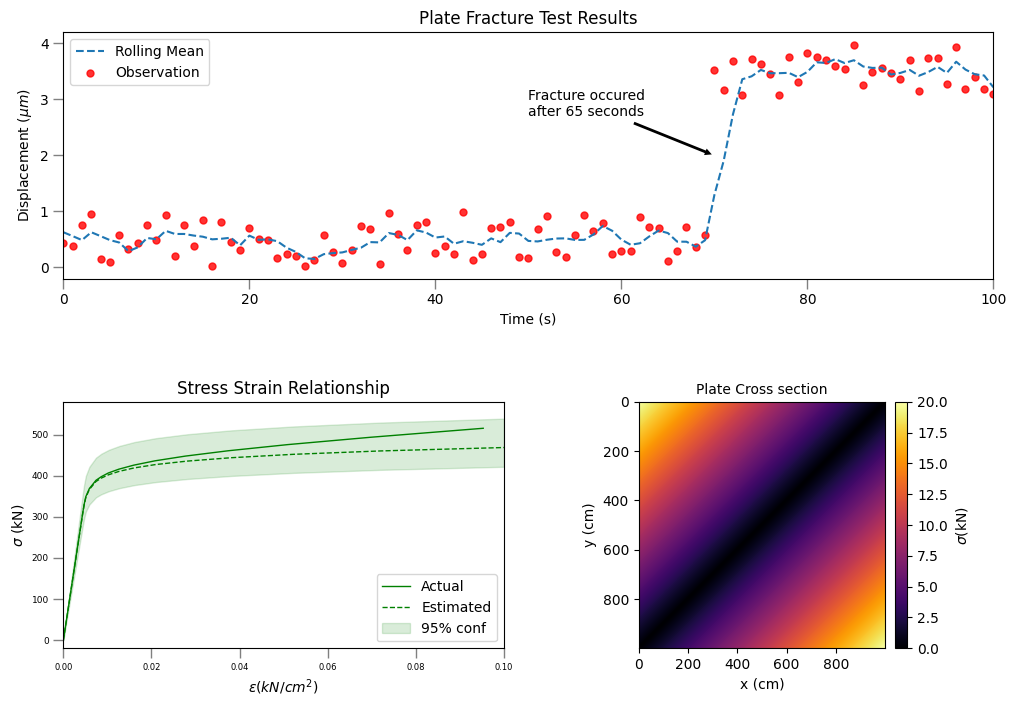